# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
In this case study, we will be studying 12,000 civilian complaints filed against New York City police officers, out main goal is to know whether there is a relationship between the gender of the police officer and their age to the allegation incident that they were involved in. The dataset contains 33358 observations including incident details, complainant details, and well as the police officer's information, and 30 variables including categorical and numerical values. We will be access the dataset using these values. We're going to be performing a hypothesis test for the research.

### Cleaning and EDA

To more accuratly perform statistical analysis on the dataset, we will need to perform data cleaning to reduce dimension. We will also utilize bar charts, scatter plots, etc. to perform EDA(Explainatory Data Analysis)

* **Cleaning the data** 

1. For conditions that were unable to record from the dataset, we decided to replace those values with `NaNs`. 
    * The following keyword in the dataset columns values will be converted: `'Unknown'`, `'Refused'`,`'non-conforming'`, `'Not described'`

1. We also observed categorical data such as `Transman (FTM)'`,`'Transwoman (MTF)'` in the `'complainant_gender'` column of the dataset that could be categorized into `'Male'` and `'Female'`, accordingly. 

1. Transform `'mos_gender'` column values into `'Male'` and `'Female'`

1. Combine the `'month_received'` and `'year_received'` column into `'complaint_receive_date'` and convert it to a **datatime** object.

1. Combine the `'month_closed'` and `'year_closed'` column into `'complaint_closed_date'` and convert it to a **datatime** object.

1. Combine the `'first_name'` and `'last_name'` column into `'mos_name'` and convert it to a **string** object.


* **Univariate Analysis:**
We plotted a histrgram distribution on `'year_received'` and `'year_closed'` column, and we discovered that the allegation incidents are increasing in a exponential growth on averate, we do see a pike in 2006 and 2013, it might implies to certain movements occuring in the society at the moment. Also, the two distribution are sharing a similar shape, which we can also say that the government is working on the incidents at a good pace so that the cases are being handled in time. 


* **Bivariate Analysis:**
We conducted a multiple box plot on `'mos_age_incident'` and `'mos_ethnicity'` to observe the range and mean of the officer that was being reported, as well as `'complainant_age_incident'` and `'complainant_ethnicity'`. From officer box plot, we observed that most of the officers that was being acused of allegation are around 33 years old and the distribution of officer's ethinicity are about the same except for American Indian, American Indian has the least amount of cases across all the other races. On the other hand, the complainant ages range and mean shares across all the ethnicity and in around 30-35 years old, which are also at a similar age like as the officers that we being reported. 


* **Interesting Aggregates:** 
In this case, we aggreated the `'contact_reason'` column and `'complainant_ethnicity'` with `'allegation'`, to get the most-frequent happened allegation. By knowing the different behavior, we can observed the allegations were being charged to the officer based on complainant's ethnicity along with the contact reason. 


### Assessment of Missingness
We observed the majority of the missing value of the dataset comes from the complainant information such as age and gender. We decided to assess the missingness by using complainant ethnicity and police officer's gender for comparison. Empirical distribution and permutation were being used in the assessment. Both complainant ethnicity and gender shared a similar distribution of whether or not having the null values. Tvd was also being used as test statistics and by looking at the distribution, we confirm that the two variable `'mos_gender'` and `'complainant_gender'` are dependent to each other and the missingness in this case is MAR.

On the other hand, we applied the same technique to the columns `'complainant_ethnicity'` and `'month_received'`, and we obtained a test statistic lies within the empirical distribution.  We can conclude that it is possible to get such value under the null hypothesis. Thus, `'complainant_ethnicity'` is MCAR and dependent from `'month_received'`.

In addition, the missing data (column) could be ignoarable as the data is MCAR, we will remove all the null values in the dataset for a more accurate assessment of the case study.

### Hypothesis Test
In the hypothesis test, we will be looking at the `'mos_age_incident'` and the `'mos_gender'`column to trying to determine whether there is a relationship between the gender of the police officer and their age to the allegation incident that they were involved in. More specifically, we wanted to know if male tends to have a higher age in allegations. Therefore, we will be conducting the test based on the following hypothesis: 
- **Null hypothesis**: In the population, age of male and female has the same distribution.

- **Alternative hypothesis**: In the population, male tends to have a higher age in allegations.

**Process**

We shuffled the age column `'mos_age_incident'` and assessed the difference in `'mos_gender'` and appended the test statistic in the a result list. We repeated the test for 1000 time to get the simulated distribution under the null hypothesis.

**Result**
- After conducting the results, we observed the observed value lies outside of the emprical distribution under the null hypothesis
- Therefore, we reject the null hypothesis: the two groups do not come from the same distribution. That is, officer's gender and age do not come from the same distribution, the result seems to favor the alternative hypothesis, but we cannot conclude that male has a higher age at the incident time frame.
- To improve the test result, we can introduce machine learning techniques such as logistic regression to find a better predictor to further investigate the relationship between the police officer gender and age. 

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [3]:
# Data Loading
df = pd.read_csv('allegations_202007271729.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'allegations_202007271729.csv'

In [4]:
# Create a copy of the original data
data = df.copy()

NameError: name 'df' is not defined

In [5]:
# Display the first 5 entries of the dataset
data.head()

NameError: name 'data' is not defined

In [1]:
data.info().head()

NameError: name 'data' is not defined

In [33]:
# data Cleaning

data['complainant_ethnicity'] = data['complainant_ethnicity'].replace({'Unknown':np.NaN, 'Refused':np.NaN})
data['complainant_gender'] = data['complainant_gender'].replace({'Gender non-conforming':np.NaN, 'Not described':np.NaN,'Transman (FTM)':'Male', 'Transwoman (MTF)':'Female'})
data['complaint_receive_date'] = (
    df['year_received'].astype(str) + '-' + 
    df['month_received'].astype(str).str.zfill(2)
)
data['complaint_closed_date'] = (
    df['year_closed'].astype(str) + '-' + 
    df['month_closed'].astype(str).str.zfill(2)
)
data['mos_name'] = (
    df['first_name'].astype(str) + ' ' + 
    df['last_name'].astype(str)
)
data['mos_gender'] = data['mos_gender'].replace({'M':'Male', 'F':'Female'})

data.drop_duplicates()
data = data.sort_values(by = ['month_received','year_received','month_closed', 'year_closed'])
data

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,complaint_receive_date,complaint_closed_date,mos_name
10893,20619,Troy,Patterson,FAM SEC,2609,622,1,1987,1,1987,...,NaN,Offensive Language,White,71.0,Report of Crime Past/Present,No arrest made or summons issued,Unsubstantiated,1987-01,1987-01,Troy Patterson
10898,20619,Troy,Patterson,FAM SEC,2609,624,1,1987,1,1987,...,NaN,Abuse of Authority,Threat of force,71.0,Others,Resisting Arrest/Arrested,Unsubstantiated,1987-01,1987-01,Troy Patterson
10899,20619,Troy,Patterson,FAM SEC,2609,624,1,1987,1,1987,...,NaN,Offensive Language,Jewish,71.0,Others,Resisting Arrest/Arrested,Unsubstantiated,1987-01,1987-01,Troy Patterson
7968,18770,Paul,Digiacomo,DB CID,3505,718,1,1988,1,1988,...,NaN,Discourtesy,Curse,67.0,Traffic Incidents/Accident/Prk Violation,No arrest made or summons issued,Unsubstantiated,1988-01,1988-01,Paul Digiacomo
25078,34710,John,Caban,TB DT30,0,716,1,1988,1,1988,...,NaN,Force,Slap,90.0,Summons/Complainant,Disorderly-Conduct/Arr/Summons,Unsubstantiated,1988-01,1988-01,John Caban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29194,5752,David,Ramirez,048 PCT,25053,43605,12,2019,5,2020,...,43.0,Abuse of Authority,Threat to damage/seize property,48.0,Report of other crime,No arrest made or summons issued,Unsubstantiated,2019-12,2020-05,David Ramirez
31480,83,Miles,Holman,001 PCT,31489,43620,12,2019,5,2020,...,32.0,Abuse of Authority,Failure to provide RTKA card,1.0,Parking violation,Parking summons issued,Unsubstantiated,2019-12,2020-05,Miles Holman
31481,83,Miles,Holman,001 PCT,31489,43620,12,2019,5,2020,...,32.0,Abuse of Authority,Refusal to provide shield number,1.0,Parking violation,Parking summons issued,Unsubstantiated,2019-12,2020-05,Miles Holman
31482,83,Miles,Holman,001 PCT,31489,43620,12,2019,5,2020,...,32.0,Abuse of Authority,Refusal to provide name,1.0,Parking violation,Parking summons issued,Substantiated (Command Lvl Instructions),2019-12,2020-05,Miles Holman


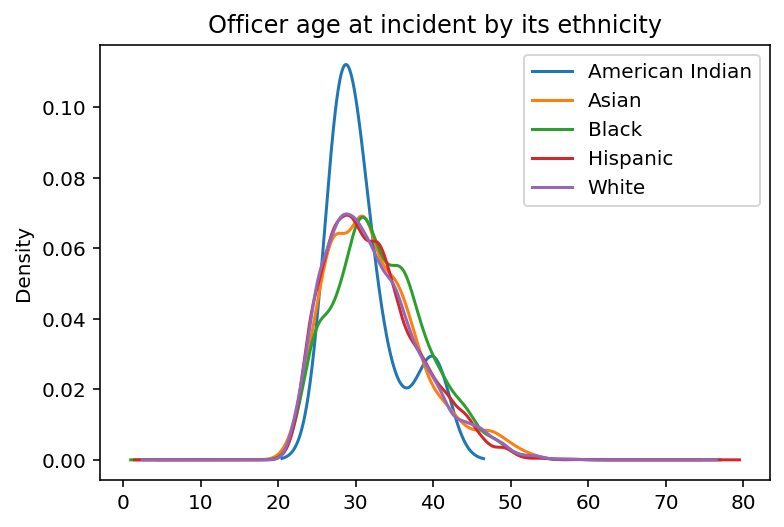

In [34]:
title='Officer age at incident by its ethnicity'
(
    data
    .groupby('mos_ethnicity')['mos_age_incident']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);   

We can see that age around 35 occured the most-often, across of all the ethnicity of the police officers.

<AxesSubplot:ylabel='Frequency'>

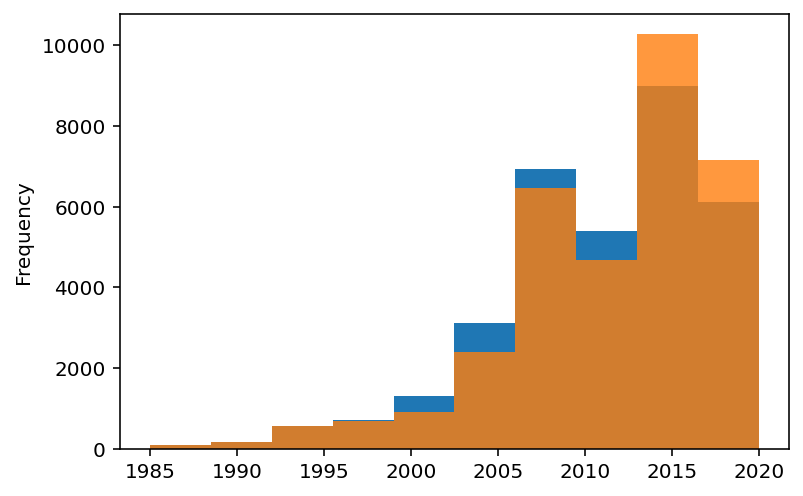

In [35]:
data['year_received'].plot(kind='hist')
data['year_closed'].plot(kind='hist',alpha=.8)

The two columns are roughly having the same distribution

<AxesSubplot:xlabel='mos_ethnicity', ylabel='mos_age_incident'>

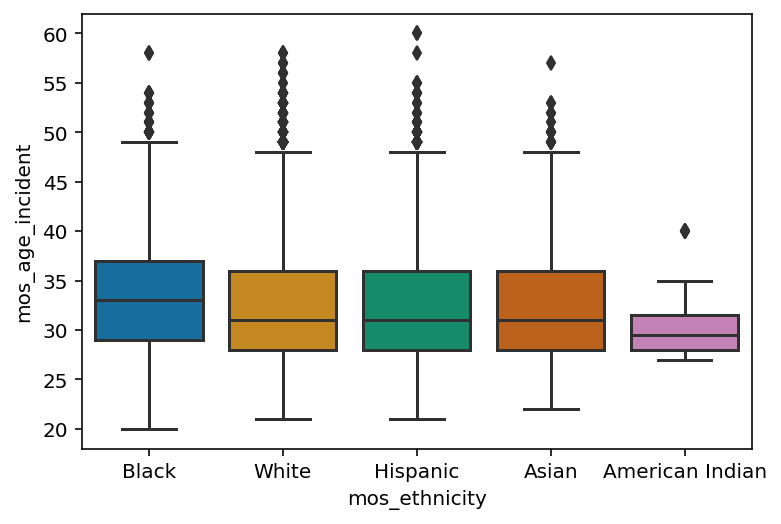

In [36]:
#multiple box plot for officer age and race

sns.boxplot(y='mos_age_incident', x = 'mos_ethnicity',
                 data=data, 
                 palette="colorblind")
                

American Indian police officers seems to have the least allegation cases, and all of the officers seems to have an average age of 30-35 at the incident time. Races except American Indian roughly shares the same porportion and ra.nges

<AxesSubplot:xlabel='complainant_ethnicity', ylabel='complainant_age_incident'>

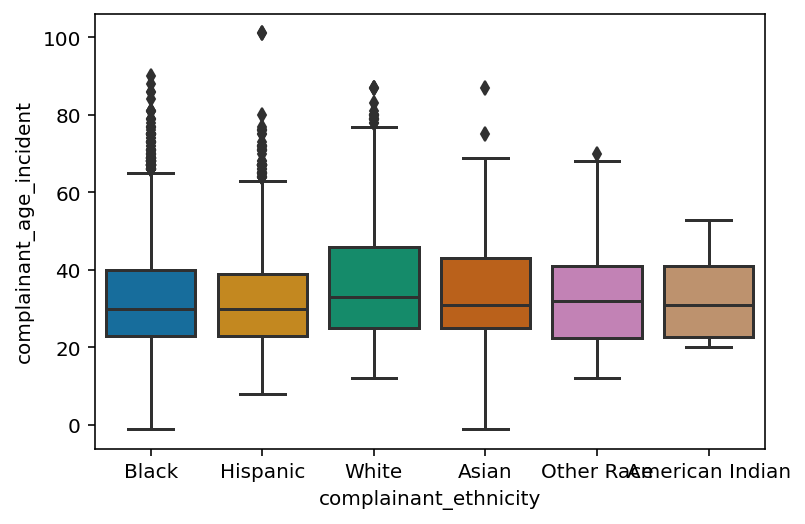

In [37]:
#multiple box plot for comlainant age and race

sns.boxplot(y='complainant_age_incident', x = 'complainant_ethnicity',
                 data=data, 
                 palette="colorblind")
                

The age range were similar across all the ethinicities among the complainant, Hispanic seems to report least of the police allegation, and White people seems to take the greatest amount

In [38]:
data.groupby(by=["contact_reason",'complainant_ethnicity']).aggregate({"allegation":"max"})

allegation
contact_reason     complainant_ethnicity                                
Aided case         Asian                         Refusal to provide name
                   Black                                            Word
                   Hispanic                                         Word
                   Other Race             Threat re: removal to hospital
                   White                                            Word
...                                                                  ...
Traffic accident   White                                            Word
Transit checkpoint Asian                                            Word
                   Black                                            Stop
                   Hispanic                           Search (of person)
                   White                                            Word

[175 rows x 1 columns]

### Assessment of Missingness

We will be assessing data on complainant details(age, gender, ethnicity, etc.) in this dataset. Moreover, we will be looking at the distributions of ethnicity similar when gender is null vs not null, and later use a permutation test with a 0.05 significance value to determine whether the test statistics are valid to use.

#### Verify that complaint ethnicities are MCAR in `data`

* Check the data look the 'same' when `complainant_gender` is null vs not-null
    - Is the empirical distribution of officer's gender similar for null/not-null?
    - Is the empirical distribution of complainant ethnicity similar for null/not-null?

In [39]:
# conditinal empirical distribution of complainant ethnicity by null and not-null
distr = (
    data
    .assign(is_null=data.complainant_gender.isnull())
    .pivot_table(index='is_null', columns='mos_gender', aggfunc='size')
)
distr = (distr.T / distr.sum(axis=1)).T
distr


mos_gender,Female,Male
is_null,,
False,0.054700,0.945300
True,0.039492,0.960508


<AxesSubplot:xlabel='mos_gender'>

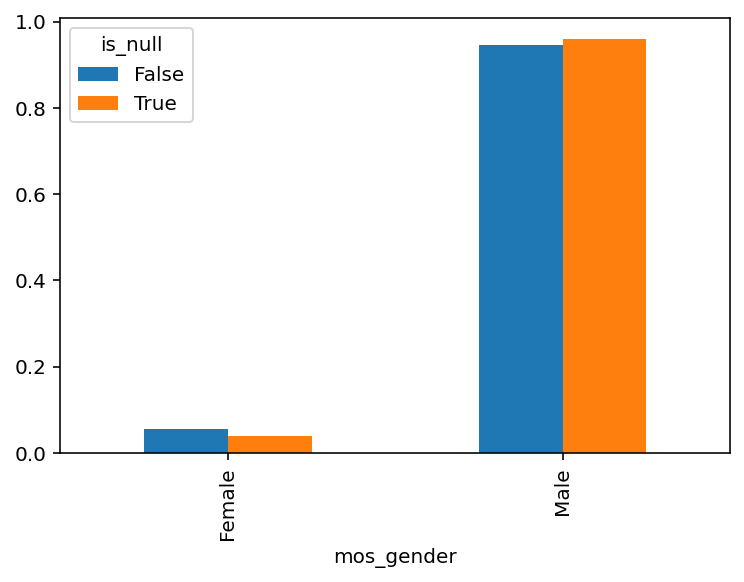

In [40]:
distr.T.plot(kind = 'bar')

Although we see that the two distribution are similar to each other, which implies that the null values are missing NMAR. But we need to perform a permutation test to validate our assumptions
* Tvd will be used as a staticial mesurman as we are having categorical variables (	Complainant gender, ethnicity)

In [41]:
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        data['mos_gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{
            'mos_gender': shuffled_col,
            'is_null': data['complainant_gender'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='mos_gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)


In [42]:
# Observed Statistic
obs = distr.diff().iloc[-1].abs().sum() / 2

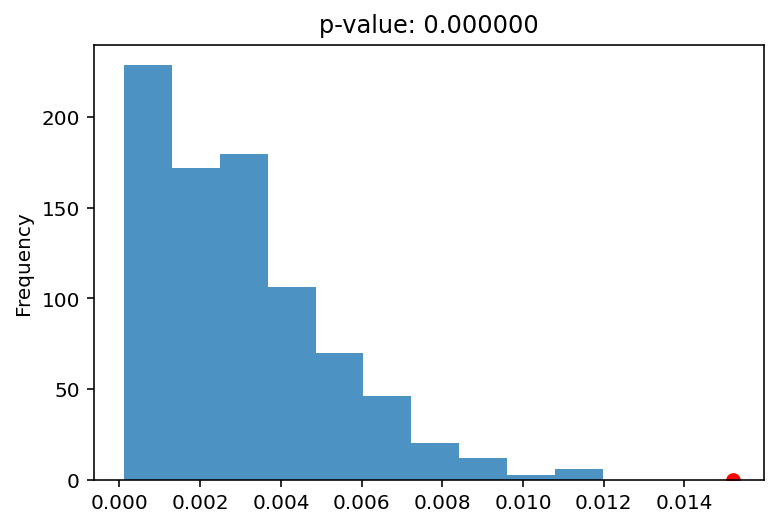

In [43]:
# The similarity is very high
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

We can see that the observed value is not consistent with the distribution becuase it is at a extreme point, therefore we can reject the null hypothesis and conclude that they are MAR.

In [44]:
distr = (
    data
    .assign(is_null=data.complainant_ethnicity.isnull())
    .pivot_table(index='is_null', columns='month_received', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

month_received,1,2,3,4,5,6,7,8,9,10,11,12
is_null,,,,,,,,,,,,
False,0.081938,0.084511,0.095745,0.086069,0.089621,0.083170,0.082083,0.090418,0.088063,0.079256,0.072045,0.06708
True,0.075642,0.088827,0.088827,0.087786,0.085878,0.084143,0.080153,0.084143,0.092991,0.102186,0.063324,0.06610


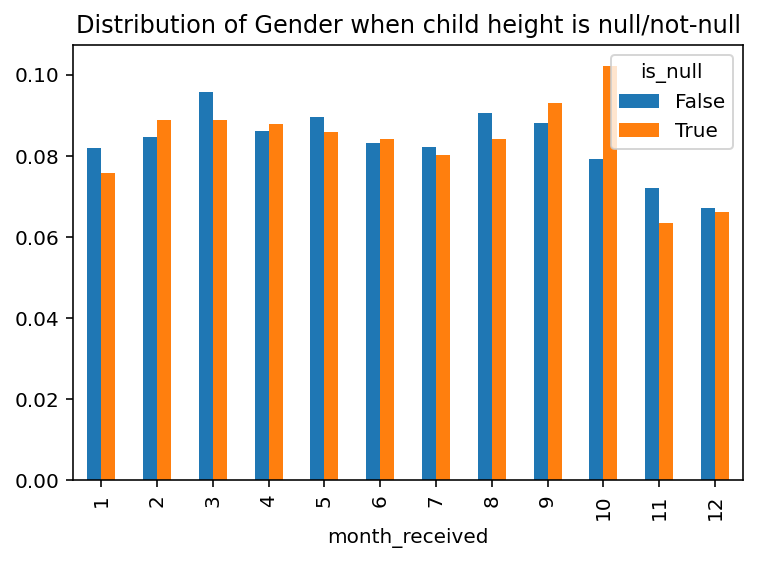

In [45]:
distr.T.plot(kind='bar', title='Distribution of Gender when child height is null/not-null');

In [46]:
n_repetitions = 1000

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        data['month_received']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{
            'month_received': shuffled_col,
            'is_null': data['complainant_ethnicity'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='month_received', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)


In [47]:
# Observed Statistic
obs = distr.diff().iloc[-1].abs().sum() / 2

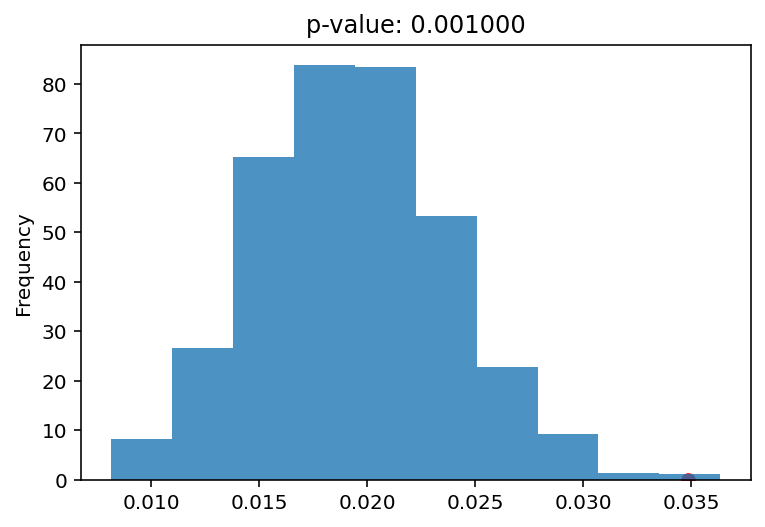

In [48]:
# The similarity is very high
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

We can see that it is possible to get such value in the distribution as the test statistic lies within the empirical distribution. Therefore, `'complainant_ethnicity'` is MCAR and dependent from `'month_received'`.

### Hypothesis Test

In [49]:
data['mos_gender'] = data['mos_gender'].replace({'Male': True, 'Female': False})

means_table = data.groupby('mos_gender').mean()

# Mean age for each ranking of the allegations
mean_age = means_table['mos_age_incident']
mean_age

mos_gender
False    31.652841
True     32.385531
Name: mos_age_incident, dtype: float64

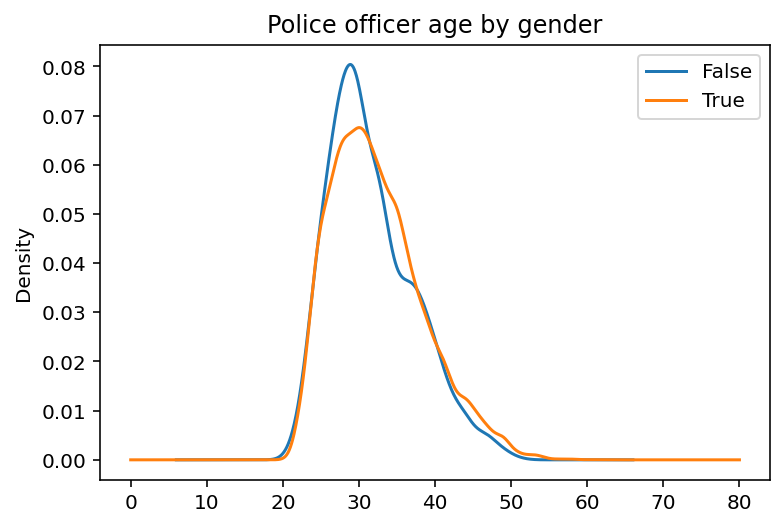

In [50]:
# Visualizing the distribution of each group

title='Police officer age by gender'

(
    data
    .groupby('mos_gender')['mos_age_incident']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);    

Recall: 
- **Null hypothesis**: In the population, age of male and female has the same distribution.
    - I.e., what we saw is due to random chance.
- **Alternative hypothesis**: In the population, male tends to have a higher age in allegations.

In [51]:
means_table = data.groupby('mos_gender').mean()
means_table

,unique_mos_id,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
mos_gender,,,,,,,,,,
False,16525.276136,8241.657386,25043.762500,6.123864,2011.442045,6.660227,2012.201136,31.652841,34.778133,58.797612
True,18261.518292,6351.903601,23841.632698,6.334673,2010.686942,6.460219,2011.488037,32.385531,32.351234,64.675376


In [52]:
obs = means_table.loc[True, 'mos_age_incident'] - means_table.loc[False, 'mos_age_incident']
obs

0.7326898207021166

In [53]:
n_repetitions = 1000

differences = []
for _ in range(n_repetitions):
    
    # shuffle the weights
    shuffled_age = (
        data['mos_age_incident']
        .sample(replace=False, frac=1)
        .reset_index(drop=True) # be sure to reset the index! (why?)
    )
    
    # put them in a table
    shuffled = (
        data
        .assign(**{'Shuffled_age': shuffled_age})
    )
    
    # compute the group differences (test statistic!)
    group_means = (
        shuffled
        .groupby('mos_gender')
        .mean()
        .loc[:, 'Shuffled_age']
    )
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

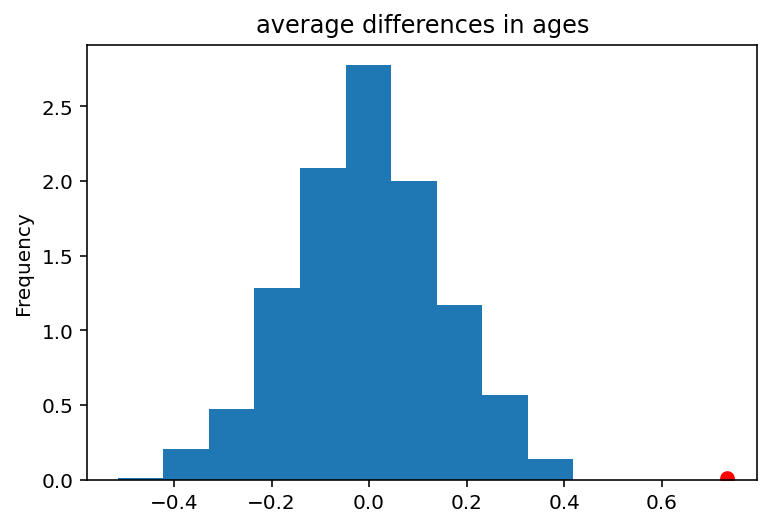

In [54]:
title = 'average differences in ages'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(obs, 0.01, color='red', s=40);

We do not observed the observed value lies under the null hypothesis assumptioned distribution